In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
book_ratings = pd.read_csv('data/BX-Book-Ratings.csv', delimiter =';', encoding = 'latin-1')
books = pd.read_csv('data/BX-Books.csv', delimiter = ';', error_bad_lines=False, encoding = 'latin-1')
users = pd.read_csv('data/BX-Users.csv', delimiter = ';', encoding = 'latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.p

In [8]:
ratings_count = book_ratings.groupby('Book-Rating').count().reset_index()
ratings_count['User-ID']

0     716109
1       1770
2       2759
3       5996
4       8904
5      50974
6      36924
7      76457
8     103736
9      67541
10     78610
Name: User-ID, dtype: int64

Text(0.5, 1.0, 'Rating Distribution')

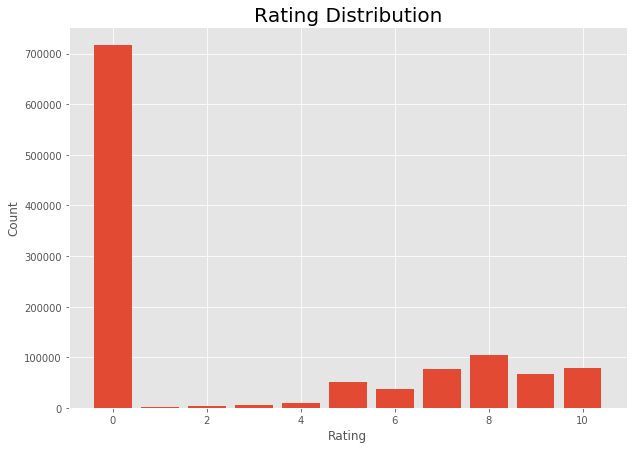

In [15]:
fig, ax = plt.subplots(figsize = (10,7))

ax.bar(ratings_count['Book-Rating'], ratings_count['User-ID'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution', fontsize = 20)

In [114]:
average_ratings = pd.DataFrame(book_ratings.groupby('ISBN')['Book-Rating'].mean())
average_ratings['Count'] = pd.DataFrame(book_ratings.groupby('ISBN')['Book-Rating'].count())

average_ratings.sort_values('Count', ascending=False)

,Book-Rating,Count
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723
...,...,...
0801064090,0.000000,1
0801064252,5.000000,1
0801064279,0.000000,1


In [119]:
users_book_ratings = pd.DataFrame(book_ratings.groupby('User-ID')['User-ID'].count())
users_book_ratings.rename(columns = {'User-ID': 'books-rated'}, inplace=True)
users_book_ratings = users_book_ratings.reset_index()

filtered_users = users_book_ratings[users_book_ratings['books-rated'] >= 100]
filtered_books = average_ratings[average_ratings['Count'] >= 100]

filtered_books.reset_index(inplace=True)

## Filter out users with less than 100 books rated and books with less than 100 ratings.

In [121]:
#Filter by the users with at least 100 rated books
filtered_ratings = book_ratings[book_ratings['User-ID'].isin(filtered_users['User-ID'])]

#Filter by books with at least 100 ratings
filtered_ratings = filtered_ratings[filtered_ratings['ISBN'].isin(filtered_books['ISBN'])]


#DataFrame containing users with at least 100 rated boooks and their ratings for the books they have read. Books with less than 100 ratings are
#included in the data
filtered_ratings

,User-ID,ISBN,Book-Rating
413,276925,002542730X,10
426,276925,0316666343,0
429,276925,0385504209,8
453,276925,0804106304,0
457,276925,0971880107,0
...,...,...,...
1149553,276680,0446670251,0
1149564,276680,0452283205,7
1149577,276680,0679731725,0
1149581,276680,0679781587,9
